In [1]:
%load_ext rpy2.ipython

In [8]:
%%R
library(phyloseq)
library(plyr)
library(dplyr); library(tidyr)
library(ggplot2)
library(rwantshue)
library(RColorBrewer)

In [13]:
%%R
l2fc<-read.csv("../../SeqData/l2fc.csv")
head(l2fc)

  Month Trtmt        OTU  baseMean       l2FC       SE     pvalue  Kingdom
1     2     Q 95_1222810 0.6467538  1.2933424 2.275190 0.56972626 Bacteria
2     2     Q  65_942692 1.3620826  2.3591041 1.626242 0.14687813 Bacteria
3     2     Q   7_125682 1.9984384 -0.4343198 1.771362 0.80630953 Bacteria
4     2     Q  58_735746 0.5025454 -1.7391473 2.648443 0.51139459 Bacteria
5     2     Q 104_423826 0.7817250 -1.9095696 2.635427 0.46871170 Bacteria
6     2     Q  91_159495 4.6514315  2.2728667 1.059449 0.03192661 Bacteria
          Phylum              Class   Order Family Genus Species      padj
1 Proteobacteria Betaproteobacteria SC-I-84   <NA>  <NA>    <NA> 0.7031080
2 Proteobacteria Betaproteobacteria SC-I-84   <NA>  <NA>    <NA> 0.2973980
3 Proteobacteria Betaproteobacteria SC-I-84   <NA>  <NA>    <NA> 0.8724516
4 Proteobacteria Betaproteobacteria SC-I-84   <NA>  <NA>    <NA> 0.6572038
5 Proteobacteria Betaproteobacteria SC-I-84   <NA>  <NA>    <NA> 0.6227213
6 Proteobacteria Betaprot

In [64]:
%%R
d.plot = l2fc %>% 
# Using our log-2-fold change data table...
        select(OTU, Trtmt, Month, Kingdom, Phylum, Class, Order, Family, Genus, Species, l2FC) %>%
# Collects all the values that should not vary except for l2FC
        spread(Trtmt, l2FC)
# Creates new columns with the treatment (F or Q) and their l2FC values
head(d.plot)
dim(d.plot)

[1] 8539   11


In [67]:
%%R
dim(d.plot[complete.cases(d.plot$F)==TRUE & complete.cases(d.plot$Q)==TRUE ,])

[1] 6143   11


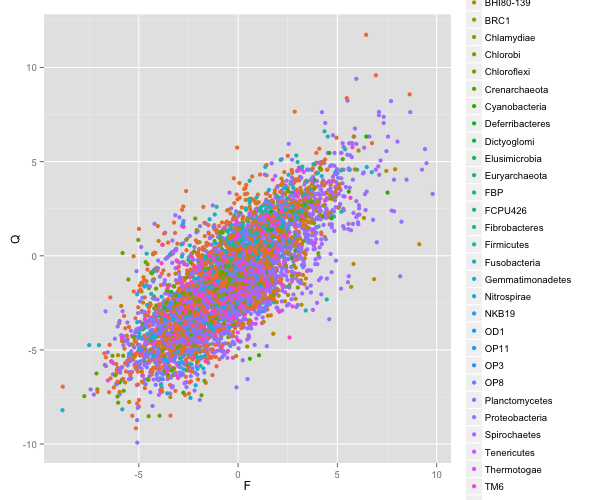

In [68]:
%%R -w 600 -h 500
D = d.plot
p = ggplot(D, aes(x=F, y=Q, colour=Phylum))
p = p + geom_point()
p

In [105]:
%%R
d.iron <- d.plot[d.plot$Genus=="Acidithrix",]
d.iron <- d.iron[complete.cases(d.iron$OTU),]
d.iron

 [1] OTU     Month   Kingdom Phylum  Class   Order   Family  Genus   Species
[10] F       Q      
<0 rows> (or 0-length row.names)


I'm interested to know, which ones increased in F, but not so much in Q?

In [75]:
%%R
d.FhQl <- d.plot[d.plot$F>=3 & d.plot$Q<=3,]
d.FhQl <- d.FhQl[complete.cases(d.FhQl$OTU),]
dim(d.FhQl)

[1] 300  11


In [83]:
%%R
d.FlQh <- d.plot[d.plot$F<=3 & d.plot$Q>=3,]
d.FlQh <- d.FlQh[complete.cases(d.FlQh$OTU),]
dim(d.FlQh)

[1] 101  11


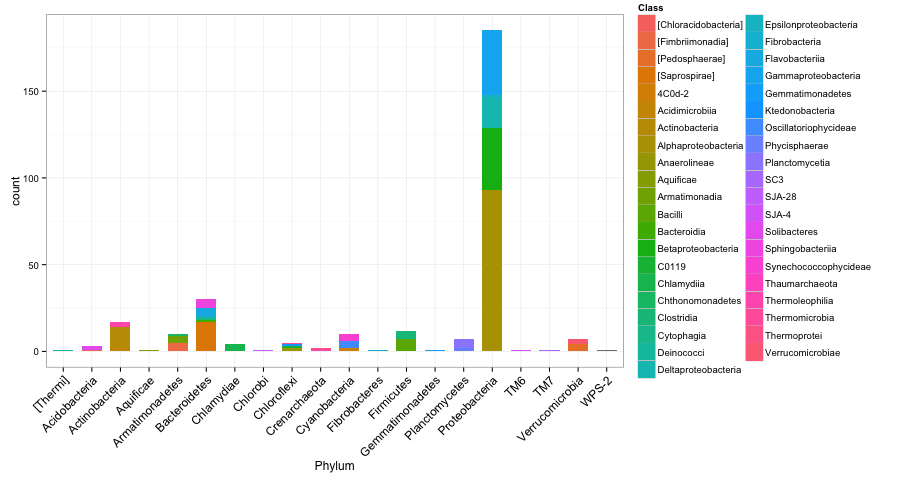

In [88]:
%%R -w 900

p = ggplot(d.FhQl, aes(x = Phylum, fill = Class))

#p = p + facet_grid(. ~ Trtmt, scales = "free_x", space = "free")

#p = p + scale_fill_manual(values = colors)

p = p + geom_bar(stat = "bin", width = 0.70)

p = p + guides(fill = guide_legend(ncol = 2))

p = p + theme_bw()

p = p + theme(axis.text.x = element_text(angle=45, size=12, hjust=1))

p

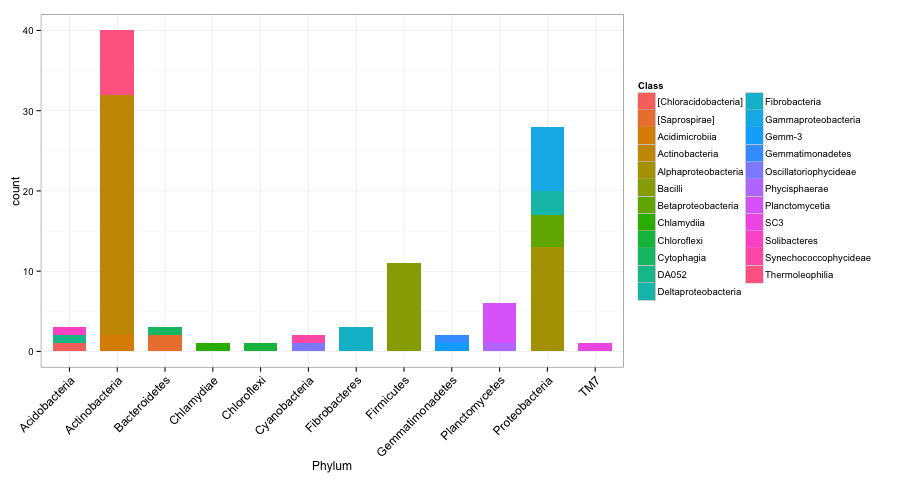

In [87]:
%%R -w 900

p = ggplot(d.FlQh, aes(x = Phylum, fill = Class))

#p = p + facet_grid(. ~ Trtmt, scales = "free_x", space = "free")

#p = p + scale_fill_manual(values = colors)

p = p + geom_bar(stat = "bin", width = 0.70)

p = p + guides(fill = guide_legend(ncol = 2))

p = p + theme_bw()

p = p + theme(axis.text.x = element_text(angle=45, size=12, hjust=1))

p